In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data=pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")

In [4]:
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [24]:
columns_to_drop=["name","boat","body","home.dest","ticket","cabin","embarked"]

In [90]:
cleaned_data=train_data.drop(columns=columns_to_drop)
test_data=test_data.drop(columns=columns_to_drop)

In [91]:
cleaned_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.750
1,2.0,0.0,male,39.0,0.0,0.0,26.000
2,2.0,1.0,female,40.0,0.0,0.0,13.000
3,3.0,1.0,female,31.0,1.0,1.0,20.525
4,3.0,1.0,female,NaN,2.0,0.0,23.250


In [92]:
cleaned_data["age"]=cleaned_data["age"].fillna(cleaned_data["age"].mean())
test_data["age"]=test_data["age"].fillna(test_data["age"].mean())
cleaned_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,29.838978,0.0,0.0,7.750
1,2.0,0.0,male,39.000000,0.0,0.0,26.000
2,2.0,1.0,female,40.000000,0.0,0.0,13.000
3,3.0,1.0,female,31.000000,1.0,1.0,20.525
4,3.0,1.0,female,29.838978,2.0,0.0,23.250


In [93]:
lb=LabelEncoder()
cleaned_data["sex"]=lb.fit_transform(cleaned_data["sex"])
test_data["sex"]=lb.fit_transform(test_data["sex"])
cleaned_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,29.838978,0.0,0.0,7.750
1,2.0,0.0,1,39.000000,0.0,0.0,26.000
2,2.0,1.0,0,40.000000,0.0,0.0,13.000
3,3.0,1.0,0,31.000000,1.0,1.0,20.525
4,3.0,1.0,0,29.838978,2.0,0.0,23.250


In [94]:
input_col=["pclass","sex","age","sibsp","parch","fare"]
output_col=["survived"]
X=cleaned_data[input_col]
Y=cleaned_data[output_col]

In [95]:
print(X.shape,Y.shape)
print(type(X))

(1009, 6) (1009, 1)
<class 'pandas.core.frame.DataFrame'>


In [96]:
#define entropy
def entropy(col):
    counts=np.unique(col,return_counts=True)
    total=float(col.shape[0])
    entropy=0.0
    for ix in counts[1]:
        p=ix/total
        entropy+=-1*p*np.log2(p)
    return entropy

In [97]:
#col=np.array([1,0,0,0,1,1])
#rint(entropy(col))

In [98]:
def divide_data(x_data,fkey,fvalue):
    left_data=pd.DataFrame([],columns=x_data.columns)
    right_data=pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]
        if val>fvalue:
            right_data=right_data.append(x_data.loc[ix])
        else:
            left_data=left_data.append(x_data.loc[ix])
    return left_data,right_data

In [99]:
#left,right=divide_data(cleaned_data[:10],"sex",0.5)
#print(left)
#print(right)

In [100]:
def info_gain(x_data,fkey,fvalue):
    left,right=divide_data(x_data,fkey,fvalue)
    l=float(left.shape[0]/x_data.shape[0])
    r=float(right.shape[0]/x_data.shape[0])    
    
    if (left.shape[0]==0) or (right.shape[0]==0):
        return -1000000
    i_gain=entropy(x_data["survived"])-(l*entropy(left["survived"])+r*entropy(right["survived"]))
    return i_gain

In [101]:
for fx in X.columns:
    print(fx)
    print(info_gain(cleaned_data,fx,cleaned_data[fx].mean()))

pclass
0.055456910002982474
sex
0.19274737190850932
age
0.0010525742338489685
sibsp
0.006492394392888956
parch
0.01975608012294816
fare
0.04242793401428169


In [133]:
##building tree
class DecisionTree:
    def __init__(self,depth=1,max_depth=7):
        self.left=None
        self.right=None
        self.depth=depth
        self.max_depth=max_depth
        self.target=None
        self.fkey=None
        self.fval=None
        
    def train(self,x_train):
        features=["pclass","sex","sibsp","age","parch","fare"]
        info_gain1=[]
        for ix in features:
            data=info_gain(x_train,ix,x_train[ix].mean())
            info_gain1.append(data)
        self.fkey=features[np.argmax(info_gain1)]
        self.fval=x_train[self.fkey].mean()
        print("making decision tree at",self.fkey)
        
        data_left,data_right=divide_data(x_train,self.fkey,self.fval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if x_train["survived"].mean()>=0.5:
                self.target="survive"
            else:
                self.target="died"
            return
        if self.depth>=self.max_depth:
            if x_train["survived"].mean()>=0.5:
                self.target="survive"
            else:
                self.target="died"
            return
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        if x_train["survived"].mean()>=0.5:
            self.target="survive"
        else:
            self.target="died"
        return
    def predict(self,test):
        if test[self.fkey]>self.fval:
            if self.right is None:
                return self.target
            else:
                return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            else:
                return self.left.predict(test)

In [134]:
d=DecisionTree()
d.train(cleaned_data)

making decision tree at sex
making decision tree at pclass
making decision tree at pclass
making decision tree at fare
making decision tree at sibsp
making decision tree at age
making decision tree at age
making decision tree at age
making decision tree at sibsp
making decision tree at age
making decision tree at age
making decision tree at sibsp
making decision tree at age
making decision tree at age
making decision tree at age
making decision tree at sibsp
making decision tree at parch
making decision tree at age
making decision tree at parch
making decision tree at fare
making decision tree at sibsp
making decision tree at age
making decision tree at age
making decision tree at fare
making decision tree at age
making decision tree at sibsp
making decision tree at age
making decision tree at sibsp
making decision tree at age
making decision tree at sibsp
making decision tree at parch
making decision tree at age
making decision tree at sibsp
making decision tree at parch
making decisi

In [135]:
print(d.fkey)
print(d.fval)
print(d.left.fkey)
print(d.right.fkey)

sex
0.6422200198216056
pclass
fare


In [136]:
pred=[]
for ix in range(test_data.shape[0]):
    pred.append(d.predict(test_data.loc[ix]))

In [137]:
pred

['died',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'survive',
 'survive',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'survive',
 'survive',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'survive',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'survive',
 'survive',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'died',
 'died',
 'survive',
 'died',
 'died',
 'died',
 'survive',
 'survive',
 'survive',
 'survive',
 'survive',
 'died',
 'survi

In [138]:
lb=LabelEncoder()
pred=lb.fit_transform(pred)

In [139]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], d

In [140]:
data={
    "Id":np.arange(300),
    "survived":pred
}
df=pd.DataFrame(data)

In [141]:
df.to_csv("titanic.csv",index=False)

### Decision Tree using sklearn

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [176]:
cleaned_data["fare"]=cleaned_data["fare"].fillna(cleaned_data["fare"].mean())
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 51.4 KB


In [177]:
dt.fit(cleaned_data[input_col],cleaned_data[output_col])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [178]:
a=np.array(dt.predict(test_data[input_col]))

In [215]:
data={
    "Id":np.arange(300),
    "survived":a
}
df=pd.DataFrame(data)

In [216]:
df.to_csv("titanic.csv",index=False)

### visualization

In [181]:
import pydotplus

In [182]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

In [192]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

In [193]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [195]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
rt=RandomForestClassifier(n_estimators=31,criterion="entropy",max_depth=5)

In [212]:
rt.fit(cleaned_data[input_col],cleaned_data[output_col])

C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
a=np.array(rt.predict(test_data))

In [214]:
a

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0.

In [203]:
from sklearn.model_selection import cross_val_score

In [205]:
acc=cross_val_score(RandomForestClassifier(n_estimators=10,max_depth=5),cleaned_data[input_col],cleaned_data[output_col],cv=5).mean()

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

In [206]:
acc

0.7978030638884783

In [208]:
acc=[]
for i in range(1,50):
    acc.append(cross_val_score(RandomForestClassifier(n_estimators=10,max_depth=5),cleaned_data[input_col],cleaned_data[output_col],cv=5).mean())

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

In [209]:
acc

[0.7938278902517116,
 0.7948475444559382,
 0.8027781882665878,
 0.7859268016353875,
 0.7879217772523521,
 0.7997881877740012,
 0.8077089798532091,
 0.7948229151273336,
 0.8017437564651987,
 0.8057337076991281,
 0.7988079404955422,
 0.7938426678488745,
 0.797822767351362,
 0.8008127678439486,
 0.7928722723018571,
 0.8067188808433082,
 0.7968474459386237,
 0.7888921727993694,
 0.8047583862863897,
 0.7898724200778287,
 0.7858923205753412,
 0.801788089256687,
 0.7948278409930545,
 0.7938377419831535,
 0.7997832619082804,
 0.7898773459435495,
 0.8017979409881286,
 0.8027732624008671,
 0.797822767351362,
 0.7829466528742426,
 0.7967981872814147,
 0.8097088813358948,
 0.7968178907442983,
 0.7888872469336485,
 0.8037535096793261,
 0.8027831141323087,
 0.7988128663612629,
 0.7938475937145955,
 0.7938475937145952,
 0.798807940495542,
 0.7869021230481257,
 0.7928673464361362,
 0.7898773459435496,
 0.7918870991576771,
 0.7997734101768386,
 0.7978276932170829,
 0.7978129156199202,
 0.78888724693364

In [210]:
np.argmax(acc)

31

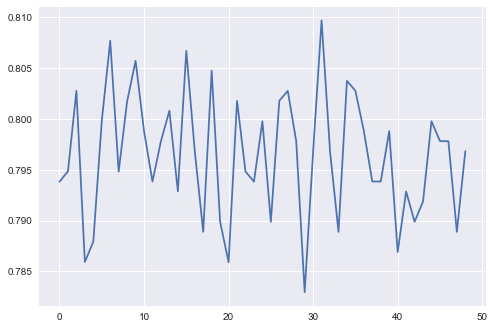

In [219]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(acc)
plt.show()